<a href="https://colab.research.google.com/github/SwarupUVM/Vehicle-Detection-Project/blob/main/Car_Detection_using_RFC_and_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image processing and feature extraction have been done using kaggle notebook. The notebook is following: https://www.kaggle.com/code/merishnasuwal/car-detection-using-svm/notebook

#Downloaging dataset in google drive

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'natural-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F42780%2F75676%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240325%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240325T011450Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D89c276fc87d9e63835761b3ba4418aab4fc5e5f3a0184b5eef428506dc84ca84f197e043319ced7cfeaa81aeb20006934c6d6266bb732a11f3577d40b5b24ffc0512c0124d69b5d97d4192da1ead6365232abf3eff7f0c02aa94bfc0a857fffa042e77277071b788a12bd6eb1a00f5e614ab923673963a7710e7e37a8b888695482fc16062338778f106711c94a6879f3d9fa1554b6a0e3055ffd792aa71ccde1322984fbd30f03955d075ad1c6f4839045edf5d4160f9c1d94049469d019ddf66ac6d7e42b68ceafaf3bb30de2e54bae01accabeb0a999fef1ccd4c74ea70e5353d4b2f5878985b2c293afe1cd2e6fe96c3613cd51628ad718816c771ab55d5,the-car-connection-picture-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F501015%2F928083%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240325%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240325T011450Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6be8efbfc08c89370f53eabe4899a7695d97b53878cf368356574f048ccec82f4e1036e38ece84e1c2c7db5e827ceb81d4d2be67678bdd2161a52ce055df5d5d694c13f535bb66335f079d6a1ff0b9bd0efdc8645ee5070f428a580df9e6a4bf44a47613c81c932477d2f2849db87ce50f27116eb6744458f3894f9576805852d0beceac695c1ca24a2bdeee22d33785ea05598c9f1f0b2f4b057c82ae115b9e186df819de3b0c8b12d5e3af252631b9c435a83744a386a385acc48cc528b7bf3568f2d6a07188fa729e32d643514dae6ccf4bfcd453352223ee5d065477b7b88ca6b790b1a130c38a602ae45b22433525ea3c518943bbb2d5240b5c8a853775'
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 358905792 bytes downloaded
Downloaded and uncompressed: natural-images
[==================================================] 715322566 bytes downloaded
Downloaded and uncompressed: the-car-connection-picture-dataset
Data source import complete.


# Mounting Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os


Mounted at /content/drive/


In [ ]:

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS5540/Final_Project/input' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['natural-images', 'the-car-connection-picture-dataset']


In [ ]:
import numpy as np
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from glob import glob
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


import PIL
import cv2
import pickle

import io
import requests

### Importing car dataset images:

In [ ]:
car_paths = glob("../input/the-car-connection-picture-dataset"+"/*")[:5000]
neg_paths = []

for class_path in glob("../input/natural-images/natural_images"+"/*"):
    if class_path != "../input/natural-images/natural_images/car":
        paths = random.choices(glob(class_path+"/*"),k=700)
        neg_paths = paths + neg_paths

print("There are {} car images in the dataset".format(len(car_paths)))
print("There are {} negative images in the dataset".format(len(neg_paths)))

There are 5000 car images in the dataset
There are 4900 negative images in the dataset


## Sample images

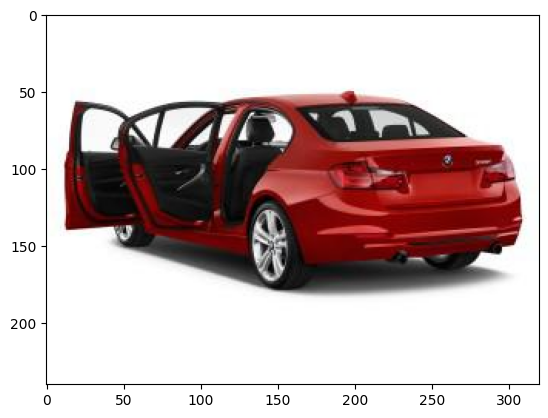

In [ ]:
def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

for file in car_paths[:1]:
    process(file)

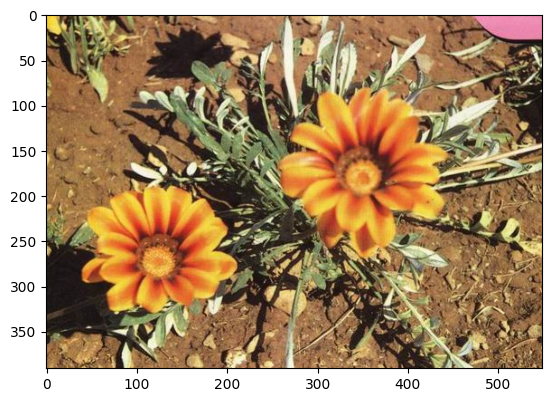

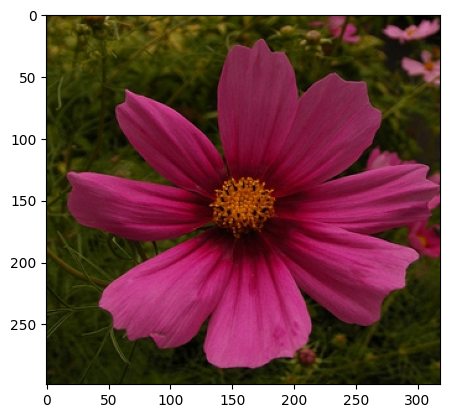

In [ ]:
for file in neg_paths[1020:1022]:
    process(file)

#### Reading images and extracting features:
In image classification tasks, we don't use images directly, because some features of images such as colors are generally redundant and expensive to consider. So we use feature extraction techniques. In machine learning based approachs we use statistics based approachs such as HOG (Histogram of Oriented Gradients) Let me show you how hog feature extracted image look like.

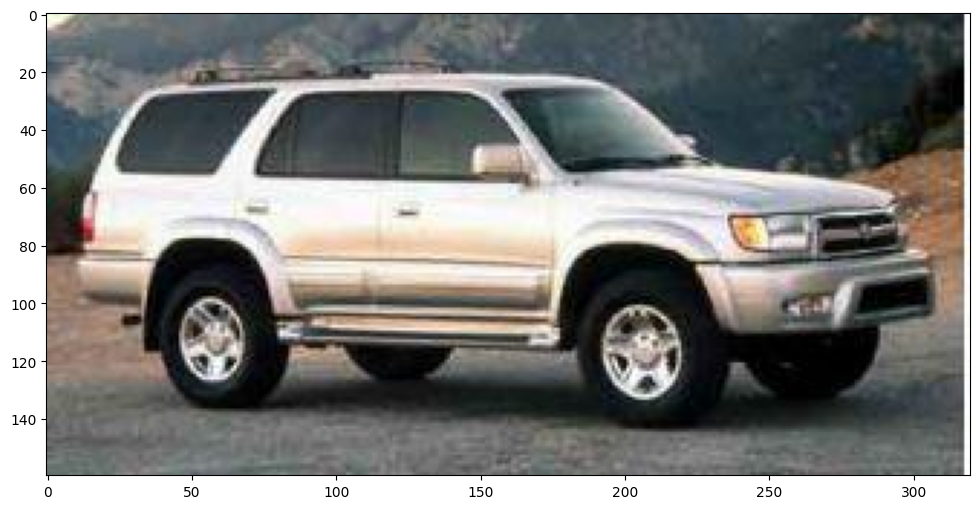

In [ ]:
example_image = np.asarray(PIL.Image.open(car_paths[51]))
fig = plt.figure(figsize=(12,6))
plt.imshow(example_image)

In [ ]:
example_image.shape

(160, 320, 3)

<ipython-input-18-6e7f7d42ca1d>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, visualized = hog(image=example_image,


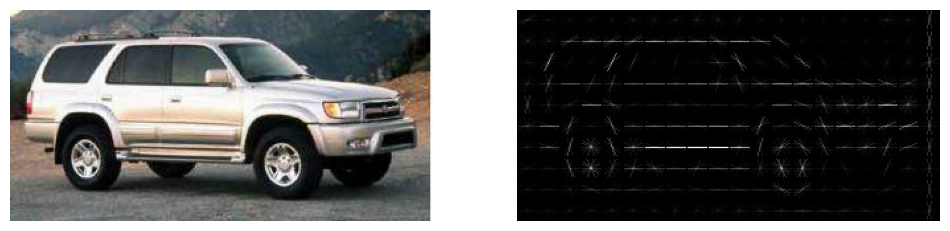

In [ ]:
from skimage.feature import hog

hog_features, visualized = hog(image=example_image,
                              orientations=9,
                              pixels_per_cell=(16,16),
                              cells_per_block=(2,2),
                              visualize=True,
                              multichannel=True)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(example_image)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(visualized,cmap="gray")
plt.axis("off")
plt.show()

Extract feature of all images

In [ ]:
#variable for image with car
pos_images = []
#variable for image with no car
neg_images = []

pos_labels = np.ones(len(car_paths))
neg_labels = np.zeros(len(neg_paths))

start = time.time()

#for image with car
for car_path in car_paths:
  #open image
    img = np.asarray(PIL.Image.open(car_path))
    # Converting image to grayscale
    img = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    #extract feature
    img = hog(img,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
  #add to the car data variable
    pos_images.append(img)

#for image with car
for neg_path in neg_paths:
   #open image
    img = np.asarray(PIL.Image.open(neg_path))
    # Converting image to grayscale
    img = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    #extract feature
    img = hog(img,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
 #add to the no car data variable
    neg_images.append(img)

 #x for all data
x = np.asarray(pos_images + neg_images)
 #y for all output label
y = np.asarray(list(pos_labels) + list(neg_labels))

processTime = round(time.time()-start,2)
print("Reading images and extracting features has taken {} seconds".format(processTime))

print("Shape of image set",x.shape)
print("Shape of labels",y.shape)

Reading images and extracting features has taken 31.98 seconds
Shape of image set (9900, 540)
Shape of labels (9900,)


Divided the dataset into train and test dataset

In [ ]:
#test dataset is 20% of overall dataset. train_test_split function is used
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7920, 540)
(1980, 540)
(7920,)
(1980,)


Prediction function for the model prediction

In [ ]:

def test_prediction(img_path, true_label, model):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2), visualize=True)

    x_tst = np.asarray(image)
    pred = model.predict([x_tst])

    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")

    elif pred[0] == 1.0:
        print("Prediction: Car")

The Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create randomForestClassifier with n_trees = 50
RFC = RandomForestClassifier(n_estimators=50,criterion='gini')
#train model with x_train and y_train
RFC.fit(x_train,y_train)
#calculate accuracy score with test data
accuracy_score_RFC = RFC.score(x_test,y_test)
print('The score of the model is ',accuracy_score_RFC)

The score of the model is  0.9383838383838384


The Logistic Regression model

In [ ]:
#create Logistic regression model
log_reg_clf = LogisticRegression(solver='liblinear',random_state=42)
#train model with x_train and y_train
log_reg_clf.fit(x_train,y_train)
#calculate accuracy score with test data
accuracy_score_LR = log_reg_clf.score(x_test,y_test)
print('The score of the model is ',accuracy_score_LR)

The score of the model is  0.9308080808080809


Performance evalution of the Random forest model with number of tress

In [ ]:
#define maximum number of trees = 200
numb = 200
RFC_scores = []
for i in range(10, numb,10):
    #create randomForestClassifier
    RFC = RandomForestClassifier(n_estimators=i,criterion='gini')
    #train model with x_train and y_train
    RFC.fit(x_train,y_train)
    #testing the accuracy of the model and save it
    RFC_scores.append(RFC.score(x_test,y_test))

Show the plot of analsys

Text(0, 0.5, 'RFC_Scores')

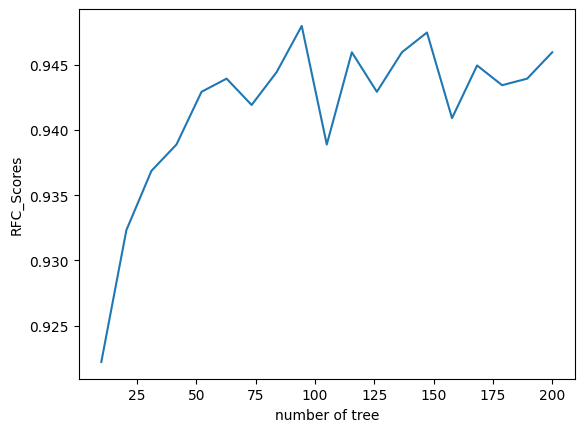

In [ ]:
plt.figure()
num = int((numb - 10) / 10)
i = np.linspace(10, numb, num=num)
plt.plot(i,RFC_scores)
plt.xlabel('number of tree')
plt.ylabel('RFC_Scores')

## Building sliding window and heatmap:

* First, we'll define a function that slides over an image and returns coords of the cells and feature extracted cells

(such as [coords=(w1=60,w2=154,h1=90,h2=154),features=(hog features with shape 540)]))

In [ ]:
def slideExtract(image,windowSize=(96,64),channel="RGB",step=12):

    # Converting to grayscale
    if channel == "RGB":
        img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    elif channel == "BGR":
        img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    elif channel.lower()!="grayscale" or channel.lower()!="gray":
        raise Exception("Invalid channel type")

    # We'll store coords and features in these lists
    coords = []
    features = []

    hIm,wIm = image.shape[:2]


    # W1 will start from 0 to end of image - window size
    # W2 will start from window size to end of image
    # We'll use step (stride) like convolution kernels.
    for w1,w2 in zip(range(0,wIm-windowSize[0],step),range(windowSize[0],wIm,step)):

        for h1,h2 in zip(range(0,hIm-windowSize[1],step),range(windowSize[1],hIm,step)):
            window = img[h1:h2,w1:w2]
            features_of_window = hog(window,orientations=9,pixels_per_cell=(16,16),
                                     cells_per_block=(2,2)
                                    )

            coords.append((w1,w2,h1,h2))
            features.append(features_of_window)

    return (coords,np.asarray(features))

* Let's try our sliding window function in an image.

In [ ]:
example_image = np.asarray(PIL.Image.open("../input/the-car-connection-picture-dataset/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Mro.jpg"))
coords,features = slideExtract(example_image,channel="RGB")

coords[:5]

[(0, 96, 0, 64),
 (0, 96, 12, 76),
 (0, 96, 24, 88),
 (0, 96, 36, 100),
 (0, 96, 48, 112)]

In [ ]:
features.shape

(285, 540)

Draw the heatmap. Using the notebook is following: https://www.kaggle.com/code/merishnasuwal/car-detection-using-svm/notebook

In [ ]:
from sklearn.preprocessing import MinMaxScaler

class Heatmap():

    def __init__(self,original_image):

        # Mask attribute is the heatmap initialized with zeros
        self.mask = np.zeros(original_image.shape[:2])

    # Increase value of region function will add some heat to heatmap
    def incValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] + 30

    # Decrease value of region function will remove some heat from heatmap
    # this function if a region considered negative
    def decValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] - 30

    def compileHeatmap(self):

        # As we know,pixel values must be between 0 and 255 (uint8)
        # scale the values between 0 and 255 and convert it to uint8

        # Scaling between 0 and 1
        scaler = MinMaxScaler()

        self.mask = scaler.fit_transform(self.mask)


        # Scaling between 0 and 255
        self.mask = np.asarray(self.mask * 255).astype(np.uint8)

        # if a value is higher than 170, it will be white else
        # it will be black
        self.mask = cv2.inRange(self.mask,170,255)

        return self.mask

In [ ]:
#declaring a function for testing model with new image
#function input is image and model name
def detect(image, model):

    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)


    for i in range(len(features)):
        # If region is positive then add some heat
        decision = model.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])

    # Compiling heatmap
    mask = htmp.compileHeatmap()

    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 20*20:
            continue

        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)

    return image

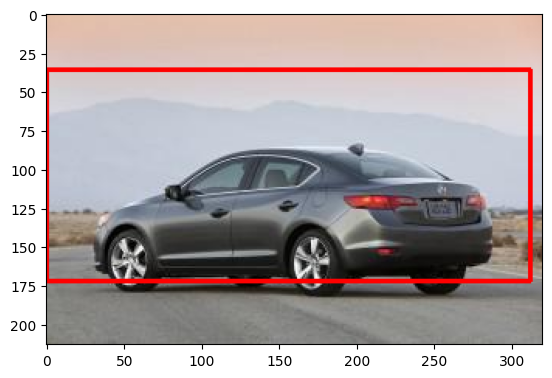

In [ ]:
#detecting car with the random forest with detecting function
detected = detect(np.asarray(PIL.Image.open("../input/the-car-connection-picture-dataset/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_ylA.jpg")
                            ), RFC)
plt.imshow(detected)

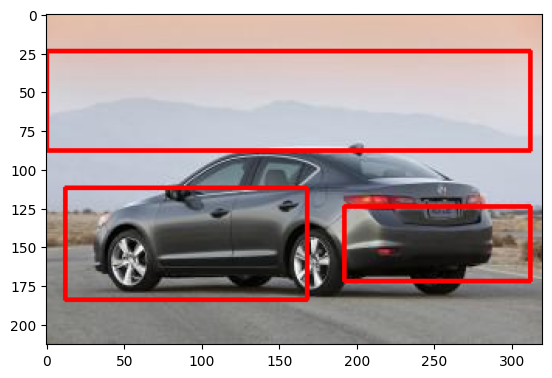

In [ ]:
#detecting car with the logistic regression with detecting function
detected = detect(np.asarray(PIL.Image.open("../input/the-car-connection-picture-dataset/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_ylA.jpg")
                            ), log_reg_clf)
plt.imshow(detected)

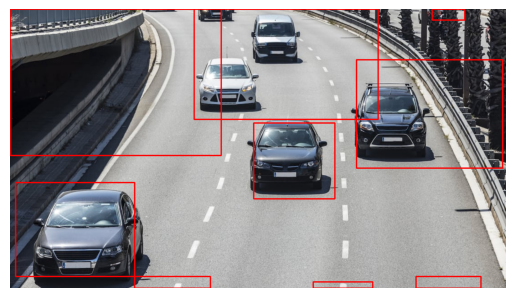

In [ ]:
#image link
byte_img = requests.get("https://images2.minutemediacdn.com/image/upload/c_crop,h_843,w_1500,x_0,y_69/f_auto,q_auto,w_1100/v1554995310/shape/mentalfloss/istock-472964014.jpg").content
byte_img = io.BytesIO(byte_img)

img = np.asarray(PIL.Image.open(byte_img))
#detecting cars with the random forest with detecting function
detected = detect(img,RFC)
plt.imshow(detected)
plt.axis("off")
plt.show()

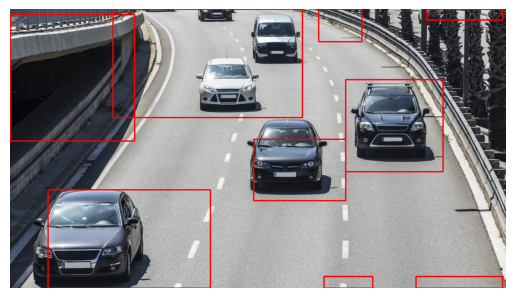

In [ ]:
#image link
byte_img = requests.get("https://images2.minutemediacdn.com/image/upload/c_crop,h_843,w_1500,x_0,y_69/f_auto,q_auto,w_1100/v1554995310/shape/mentalfloss/istock-472964014.jpg").content
byte_img = io.BytesIO(byte_img)

img = np.asarray(PIL.Image.open(byte_img))
#detecting cars with the logistic regression with detecting function
detected = detect(img,log_reg_clf)
plt.imshow(detected)
plt.axis("off")
plt.show()